<a href="https://colab.research.google.com/github/Shivam-Verma1/NLP-lab-Assignments/blob/main/NLP_in_Python_4_(Sentiment_Analysis)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the| routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,Author
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek wa...",Jonathan O’Callaghan
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the ma...,Anthony
Who Killed Alexander The Great,"In his article, James Romm explores the enduri...",Richard Wills


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,Author,polarity,subjectivity
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek wa...",Jonathan O’Callaghan,0.087356,0.451953
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the ma...,Anthony,0.122470,0.394848
Who Killed Alexander The Great,"In his article, James Romm explores the enduri...",Richard Wills,0.072629,0.472579


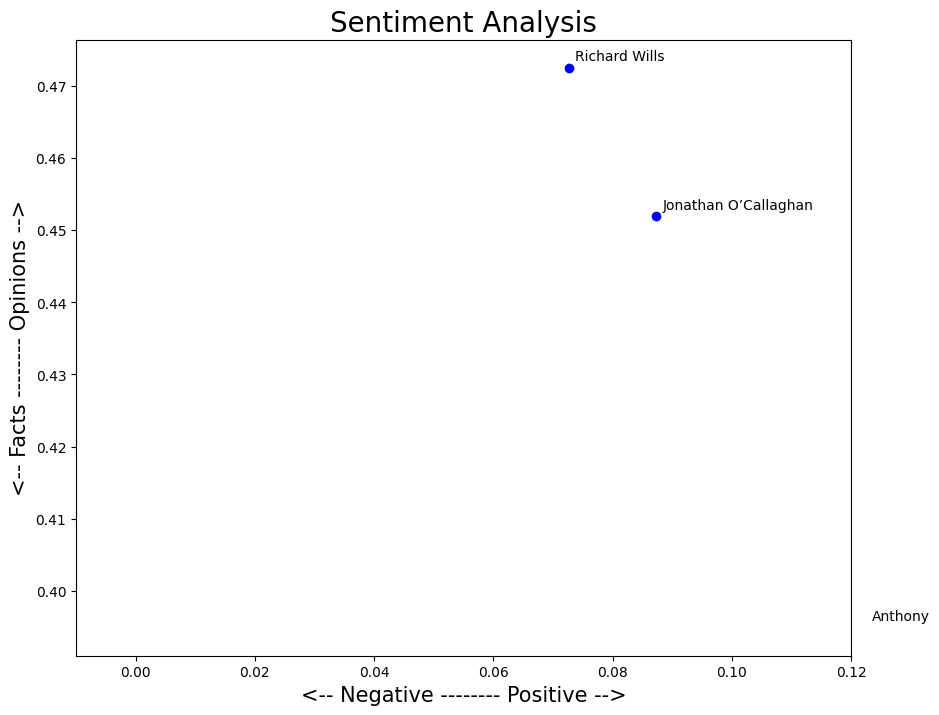

In [12]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, auth in enumerate(data.index):
    x = data.polarity.loc[auth]
    y = data.subjectivity.loc[auth]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['Author'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [13]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [14]:
# Let's take a look at our data again
data

,transcript,Author,polarity,subjectivity
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek wa...",Jonathan O’Callaghan,0.087356,0.451953
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the ma...,Anthony,0.122470,0.394848
Who Killed Alexander The Great,"In his article, James Romm explores the enduri...",Richard Wills,0.072629,0.472579


In [15]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistant. On 4 November 1979, the embassy was stormed by Iranian protestors, forcing Lijek, his wife and four others to seek refuge across the city as they awaited a daring rescue by Canada and the CIA. At 9am on Sunday 4 November 1979, Mark Lijek and his colleagues sat in shocked horror as hundreds of Iranian protestors climbed the gate of the US Embassy in Tehran. The attack was the embodiment of months of increased tension between Iran and the US, culminating in what would be one of the modern era’s highest-profile hostage crises. As the embassy fell into Iranian hands, however, Lijek and five others, including his wife, would become part of a remarkable escape plan to get out of the country. Their incredible story was retold in the Oscar-winning 2012 film Argo, but here Lijek tells us what really happened. Lijek served as a consular officer f

In [16]:
# The list has 3 elements, one for each transcript
len(list_pieces)

3

In [17]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [18]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.19835164835164837,
  0.05058674985145573,
  0.05965608465608466,
  0.04886363636363637,
  0.06312111801242236,
  0.011805555555555557,
  0.10800144300144299,
  0.16881720430107522,
  0.018537414965986394,
  0.1565359477124183],
 [0.10599242424242424,
  0.09125874125874124,
  0.056172839506172835,
  0.08394924858339492,
  0.22792779713511424,
  -0.125,
  -0.125,
  0.0,
  -0.125,
  0.3458333333333333],
 [0.10450336700336697,
  -0.06744868035190617,
  0.06845454545454546,
  0.10610380116959066,
  0.02595959595959596,
  0.15090631590631592,
  0.06772727272727275,
  0.13317073170731702,
  -0.03886979034037858,
  0.1338778409090909]]

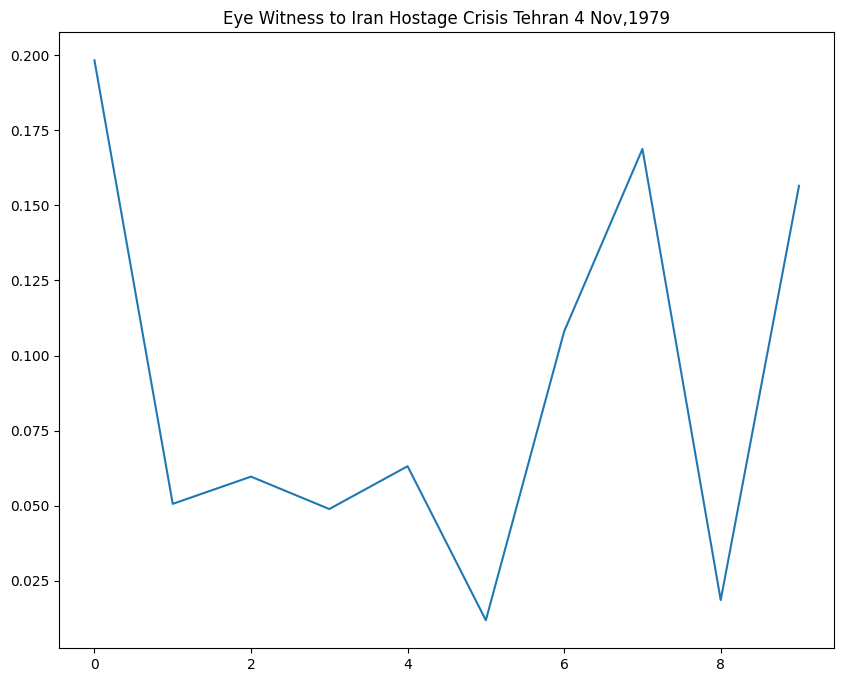

In [20]:
# Show the plot for one historian
plt.plot(polarity_transcript[0])
plt.title(data['Author'].index[0])
plt.show()

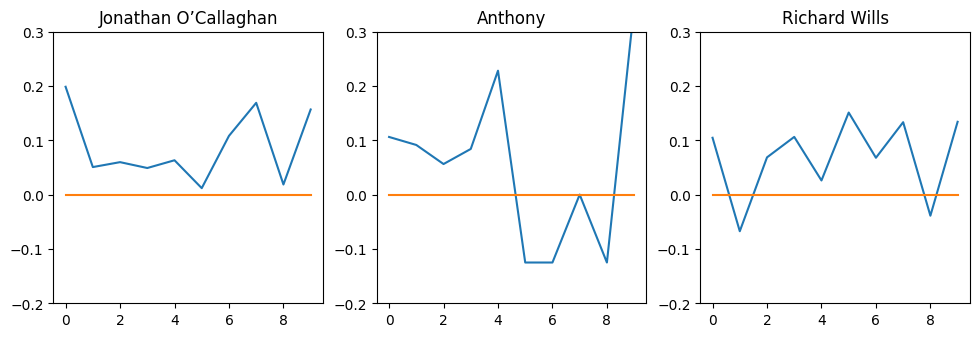

In [21]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['Author'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.



In [25]:
comedian_stats = data.groupby('Author').agg({'polarity': 'mean', 'subjectivity': 'mean'}).reset_index()
print(comedian_stats)
# Classify comedians based on polarity and subjectivity
comedian_stats['classification'] = 'Neutral'
comedian_stats.loc[comedian_stats['polarity'] > 0, 'classification'] = 'Positive'
comedian_stats.loc[comedian_stats['polarity'] < 0, 'classification'] = 'Negative'

# Display the classification
print(comedian_stats[['Author', 'classification']])

                 Author  polarity  subjectivity
0               Anthony  0.122470      0.394848
1  Jonathan O’Callaghan  0.087356      0.451953
2         Richard Wills  0.072629      0.472579
                 Author classification
0               Anthony       Positive
1  Jonathan O’Callaghan       Positive
2         Richard Wills       Positive


In [27]:
# Define classification criteria
def classify_comedian(polarity, subjectivity):
    if polarity > 0 and subjectivity > 0.5:
        return 'Positive and Subjective'
    elif polarity < 0 and subjectivity > 0.5:
        return 'Negative and Subjective'
    elif polarity > 0 and subjectivity <= 0.5:
        return 'Positive and Objective'
    elif polarity < 0 and subjectivity <= 0.5:
        return 'Negative and Objective'
    else:
        return 'Neutral'

# Apply classification function to each row
data['classification'] = data.apply(lambda row: classify_comedian(row['polarity'], row['subjectivity']), axis=1)

# Display the classification
print(data[['Author', 'classification']])

                                                                  Author  \
Eye Witness to Iran Hostage Crisis Tehran 4 Nov...  Jonathan O’Callaghan   
Napeleon A Corsican Eagle Flown into Legend                      Anthony   
Who Killed Alexander The Great                             Richard Wills   

                                                            classification  
Eye Witness to Iran Hostage Crisis Tehran 4 Nov...  Positive and Objective  
Napeleon A Corsican Eagle Flown into Legend         Positive and Objective  
Who Killed Alexander The Great                      Positive and Objective  


## 2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.

In [32]:
# Let's create a list to hold all of the pieces of text but instead of 10 let's now split into 15 parts and now see the change
list_pieces = []
for t in data.transcript:
    split = split_text(t,15)
    list_pieces.append(split)

list_pieces

[['by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistant. On 4 November 1979, the embassy was stormed by Iranian protestors, forcing Lijek, his wife and four others to seek refuge across the city as they awaited a daring rescue by Canada and the CIA. At 9am on Sunday 4 November 1979, Mark Lijek and his colleagues sat in shocked horror as hundreds of Iranian protestors climbed the gate of the US Embassy in Tehran. The attack was the embodiment of months of increased tension between Iran and the US, culminating in what would be one of the modern era’s highest-profile hostage crises. As the embassy fell into Iranian hands, however, Lijek and five others, including his wife, would become part of a remarkable escape plan to get out of the country. Their incredible story was retold in the Oscar-winning 2012 film Argo, but here Lijek tells us what really happened. Lijek served as a consular officer f

In [30]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.30833333333333335,
  0.08256974506974508,
  0.03888888888888889,
  0.08486842105263158,
  0.13230820105820104,
  -0.10902777777777777,
  0.04151785714285715,
  0.11071428571428574,
  -0.045,
  0.11829988193624556,
  0.12898715041572184,
  0.1780701754385965,
  0.07142857142857142,
  -0.12175925925925925,
  0.17111111111111113],
 [0.100566534914361,
  0.1189761904761905,
  0.06293290043290042,
  0.08240740740740742,
  0.06999999999999999,
  0.06917508417508417,
  0.21066798941798945,
  0.2520833333333333,
  -0.125,
  0.0,
  -0.125,
  0.0,
  -0.125,
  0.4166666666666667,
  0.3321428571428572],
 [0.1568181818181818,
  -0.04805871212121213,
  0.004848484848484844,
  0.12860962566844922,
  0.020108695652173932,
  0.13454106280193234,
  -0.04409090909090909,
  0.1895061728395062,
  0.11284114436288353,
  0.05145833333333335,
  0.17586206896551723,
  0.06476190476190476,
  -0.0321962481962482,
  -0.11798245614035088,
  0.26233766233766237]]

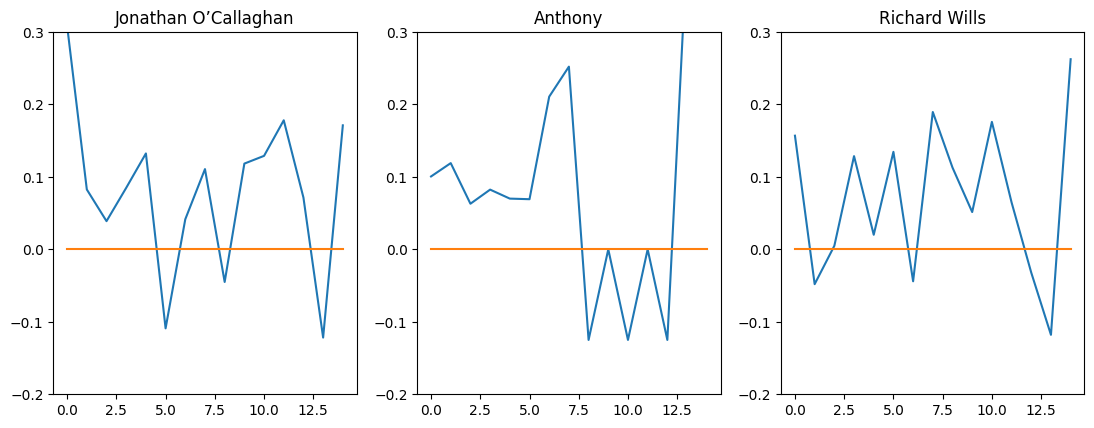

In [37]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [18, 16]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['Author'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()